In [2]:
# 1. LOAD METADATA
import pandas as pd
from pathlib import Path

INPUT_PATH = Path("../data/interim/metadata.csv")
df = pd.read_csv(INPUT_PATH)

print(f"Loaded {len(df)} samples")
df.head()


Loaded 27550 samples


,filename,json_file,status,age,gender,cough_detected,respiratory_condition,fever_muscle_pain,difficulty_in_breathing
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c.wav,00014dcc-0f06-4c27-8c7b-737b18a2cf4c.json,NaN,NaN,NaN,0.0155,unspecified,unspecified,unspecified
1,00039425-7f3a-42aa-ac13-834aaa2b6b92.wav,00039425-7f3a-42aa-ac13-834aaa2b6b92.json,healthy,15.0,male,0.9609,False,False,unspecified
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b.wav,0007c6f1-5441-40e6-9aaf-a761d8f2da3b.json,healthy,46.0,female,0.1643,False,False,unspecified
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a.wav,0009eb28-d8be-4dc1-92bb-907e53bc5c7a.json,healthy,34.0,male,0.9301,True,False,unspecified
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e.wav,0012c608-33d0-4ef7-bde3-75a0b1a0024e.json,NaN,NaN,NaN,0.0482,unspecified,unspecified,unspecified


In [3]:
print(df.head())

                                   filename  \
0  00014dcc-0f06-4c27-8c7b-737b18a2cf4c.wav   
1  00039425-7f3a-42aa-ac13-834aaa2b6b92.wav   
2  0007c6f1-5441-40e6-9aaf-a761d8f2da3b.wav   
3  0009eb28-d8be-4dc1-92bb-907e53bc5c7a.wav   
4  0012c608-33d0-4ef7-bde3-75a0b1a0024e.wav   

                                   json_file   status   age  gender  \
0  00014dcc-0f06-4c27-8c7b-737b18a2cf4c.json      NaN   NaN     NaN   
1  00039425-7f3a-42aa-ac13-834aaa2b6b92.json  healthy  15.0    male   
2  0007c6f1-5441-40e6-9aaf-a761d8f2da3b.json  healthy  46.0  female   
3  0009eb28-d8be-4dc1-92bb-907e53bc5c7a.json  healthy  34.0    male   
4  0012c608-33d0-4ef7-bde3-75a0b1a0024e.json      NaN   NaN     NaN   

   cough_detected respiratory_condition fever_muscle_pain  \
0          0.0155           unspecified       unspecified   
1          0.9609                 False             False   
2          0.1643                 False             False   
3          0.9301                  True       

In [4]:
# FILTER: keep high-confidence coughs + only COVID-19 or healthy labels
threshold = 0.8  # conservative minimum for cough detection

df_filtered = df[
    (df["cough_detected"] >= threshold) &
    (df["status"].isin(["COVID-19", "healthy"]))
    ].copy()

# Binary label: healthy → 0, COVID-19 → 1
df_filtered["label"] = df_filtered["status"].map({"healthy": 0, "COVID-19": 1})

print(f"Filtered to {len(df_filtered)} samples (cough ≥ {threshold}, COVID vs Healthy)")
df_filtered["label"].value_counts()


Filtered to 8850 samples (cough ≥ 0.8, COVID vs Healthy)


label
0    8236
1     614
Name: count, dtype: int64

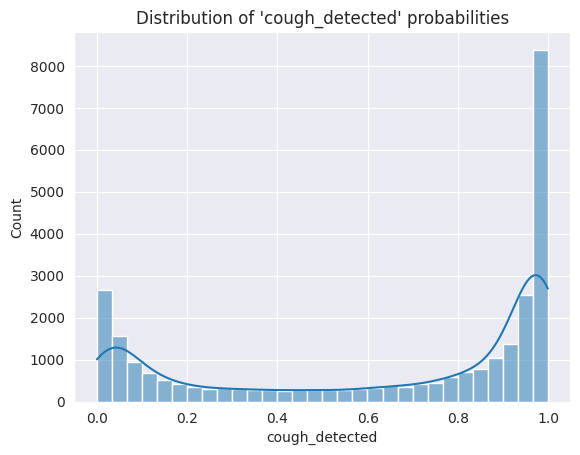

In [5]:
df["cough_detected"].describe()

# visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["cough_detected"], bins=30, kde=True)
plt.title("Distribution of 'cough_detected' probabilities")
plt.show()


In [6]:
# Optional: Gender and Age stats
print(df_filtered["gender"].value_counts())
print(df_filtered["age"].value_counts())


gender
male      5934
female    2870
other       46
Name: count, dtype: int64
age
30.0    304
28.0    267
35.0    244
24.0    244
40.0    242
       ... 
21.2      1
91.0      1
99.0      1
6.0       1
3.0       1
Name: count, Length: 91, dtype: int64


In [7]:
# 4. SAVE CLEANED METADATA
OUTPUT_PATH = Path("../data/interim/metadata_filtered.csv")
df_filtered.to_csv(OUTPUT_PATH, index=False)
print(f"Saved filtered metadata to: {OUTPUT_PATH}")


Saved filtered metadata to: ../data/interim/metadata_filtered.csv


In [8]:
len(df_filtered)


8850

In [9]:
df_filtered["label"].value_counts()


label
0    8236
1     614
Name: count, dtype: int64

In [11]:
from pathlib import Path

metadata_path = Path("../data/interim/metadata_filtered.csv")
mfcc_dir = Path("../data/processed/mfcc")

df = pd.read_csv(metadata_path)
missing = [
    f for f in df["filename"]
    if not (mfcc_dir / f.replace(".wav", ".npy")).exists()
]

print(f"{len(missing)} missing MFCC files.")


0 missing MFCC files.
